# Exploratory data analysis

## Setup

In [1]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)

Windows-10-10.0.19045-SP0
Python 3.10.5 (tags/v3.10.5:f377153, Jun  6 2022, 16:14:13) [MSC v.1929 64 bit (AMD64)]


In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../data/final/train.csv')
test = pd.read_csv('../data/final/test.csv')

train.sample(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,CabinDeck,CabinNum,CabinSide,GroupSize,Solo,FamilySize,Transported
1769,Earth,False,TRAPPIST-1e,20.0,False,2215.0,0.0,0.0,86.0,0.0,4602.0,False,F,377.0,P,1,True,4,1
5509,Europa,True,55 Cancri e,47.0,False,0.0,0.0,0.0,0.0,0.0,0.0,True,B,224.0,S,1,True,9,1
610,Europa,True,55 Cancri e,20.0,False,0.0,0.0,0.0,0.0,0.0,0.0,True,B,28.0,P,1,True,5,1
1367,Mars,False,TRAPPIST-1e,30.0,False,806.0,100.0,9.0,0.0,47.0,1924.0,False,D,52.0,S,2,False,6,0
839,Earth,False,TRAPPIST-1e,18.0,False,200.0,124.0,0.0,413.0,0.0,1474.0,False,F,188.0,P,1,True,10,1


In [4]:
train.isna().sum().sum()

0

In [5]:
TARGET = 'Transported'
FEATURES = [col for col in train.columns if col not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns

print(f'Target: {TARGET}')
print(f'Features:\n\tnumerical: {numerical.to_list()}\n\tcategorical:{categorical.to_list()}')
print(f'Shapes:\n\ttrain: {train.shape}\n\ttest: {test.shape}')

Target: Transported
Features:
	numerical: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'CabinNum', 'GroupSize', 'FamilySize']
	categorical:['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'NoSpending', 'CabinDeck', 'CabinSide', 'Solo']
Shapes:
	train: (8693, 19)
	test: (4277, 18)


In [6]:
os.makedirs('figures/eda_2', exist_ok=True)

plt.rcParams["figure.figsize"] = (1.618* 5, 5)
sns.set_theme(style="whitegrid", palette="muted")

## Response marginal analysis

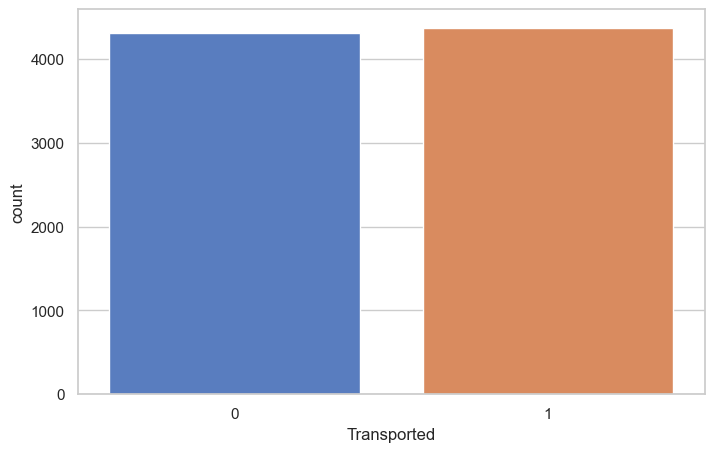

In [7]:
sns.countplot(x=TARGET, data=train)
plt.savefig('./figures/eda_2/response_marginal.png')

## Features marginal analysis

### Categorical features

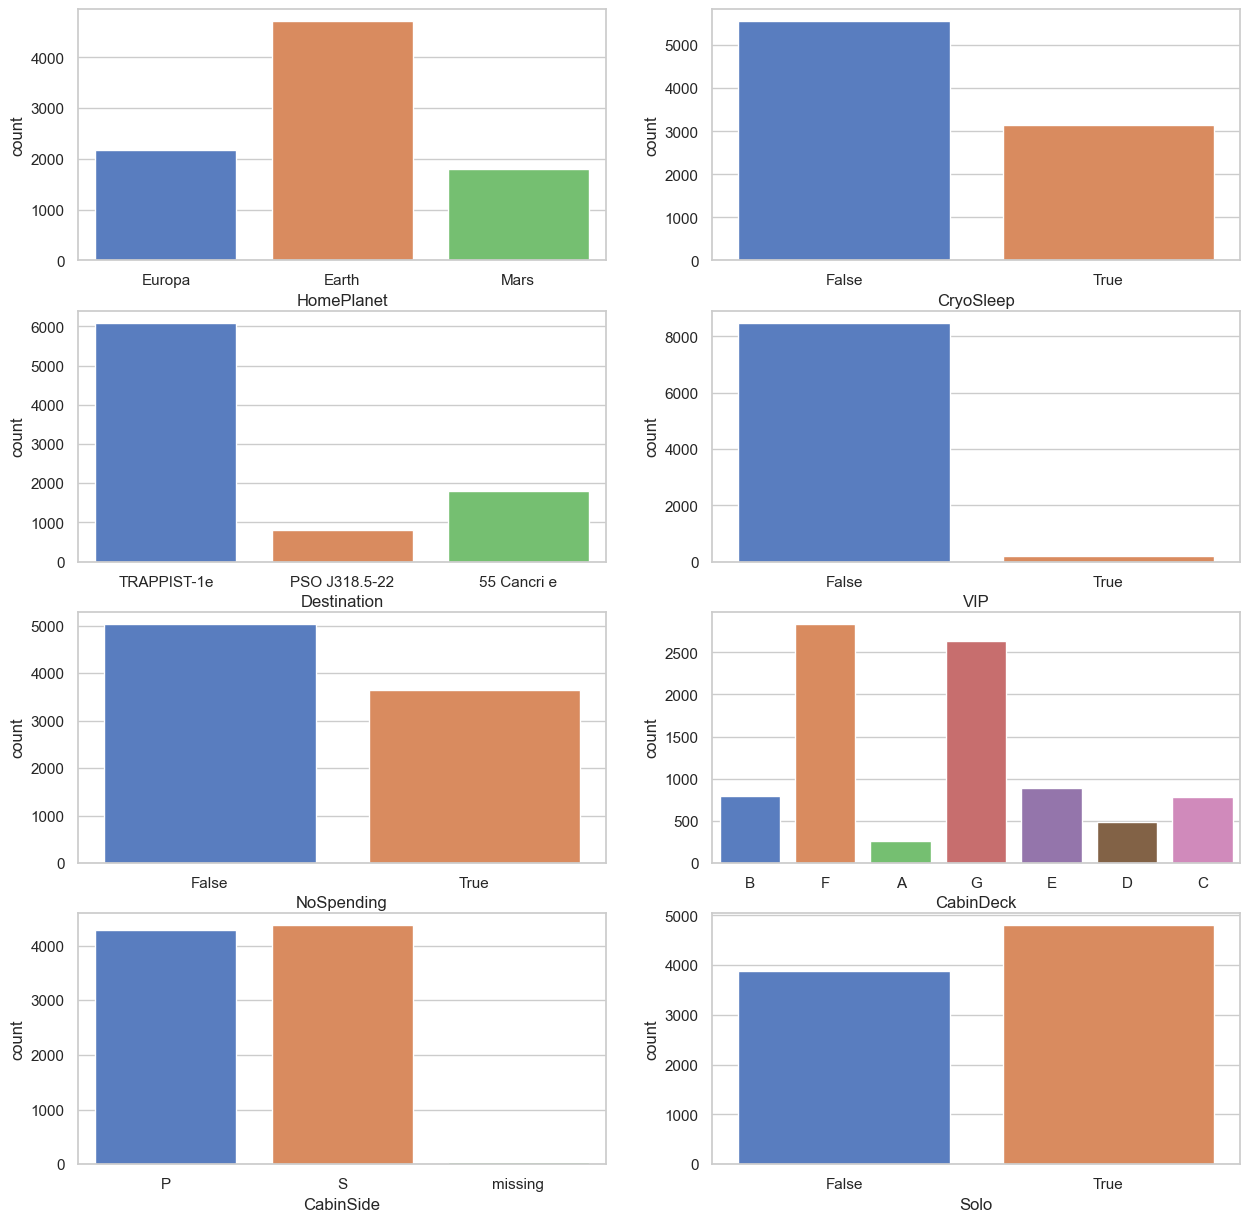

In [8]:
# countplot of categorical features
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
for c, ax in zip(categorical, axs.flatten()):
    sns.countplot(x=c, data=train, ax=ax)
plt.savefig('./figures/eda_2/categorical_marginal.png')

### Numerical features

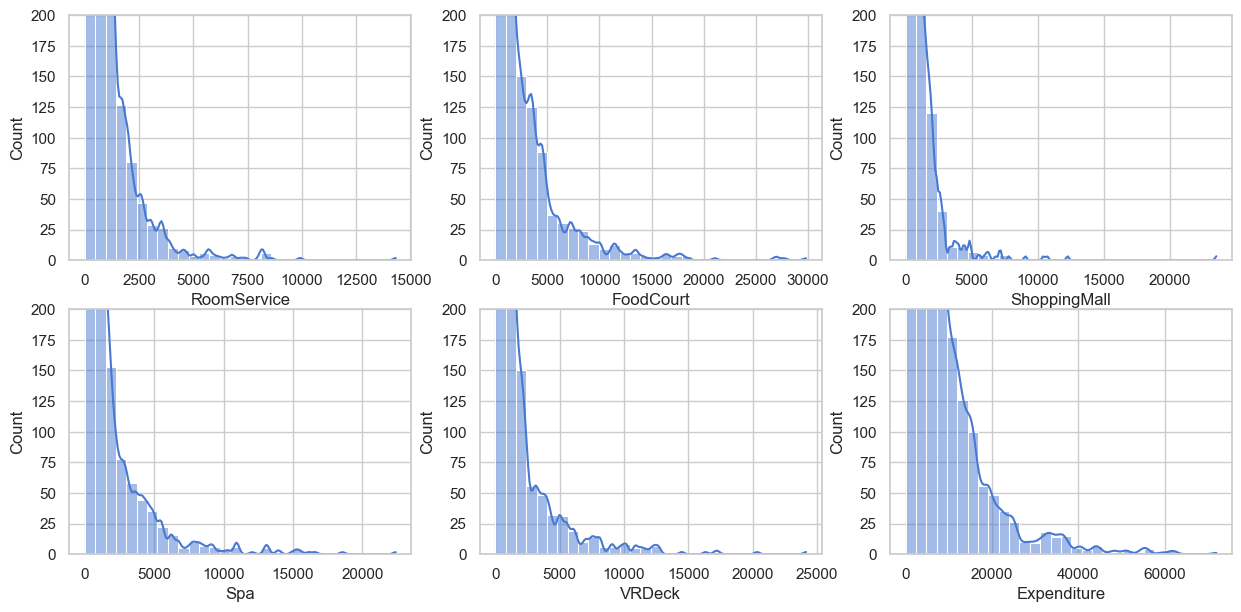

In [9]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (15, 7))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, bins=30, kde=True, ax=ax).set(ylim=[0, 200])
plt.savefig('./figures/eda_2/numerical_marginal_1.png')

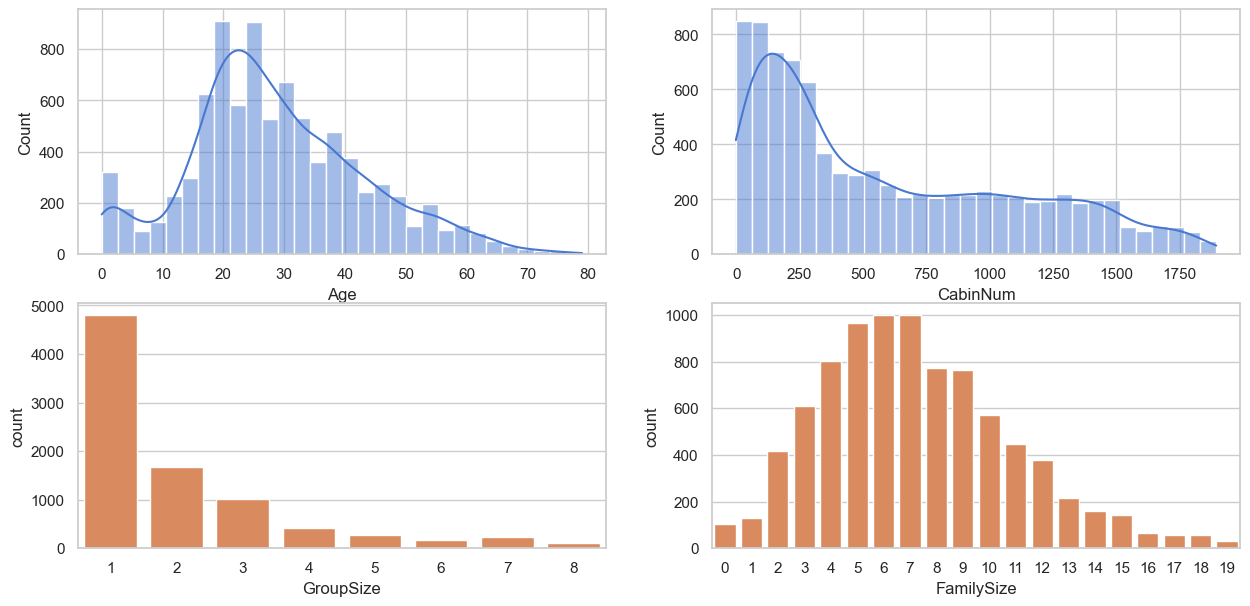

In [10]:
# distribution of other numerical
other_feats = ['Age', 'CabinNum', 'GroupSize', 'FamilySize']
fig, axs = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(x='Age', data=train, bins=30, kde=True, ax=axs.flatten()[0])
sns.histplot(x='CabinNum', data=train, bins=30, kde=True, ax=axs.flatten()[1])
sns.countplot(x='GroupSize', data=train, ax=axs.flatten()[2], color='C1')
sns.countplot(x='FamilySize', data=train, ax=axs.flatten()[3], color='C1')

plt.savefig('./figures/eda_2/numerical_marginal_2.png')

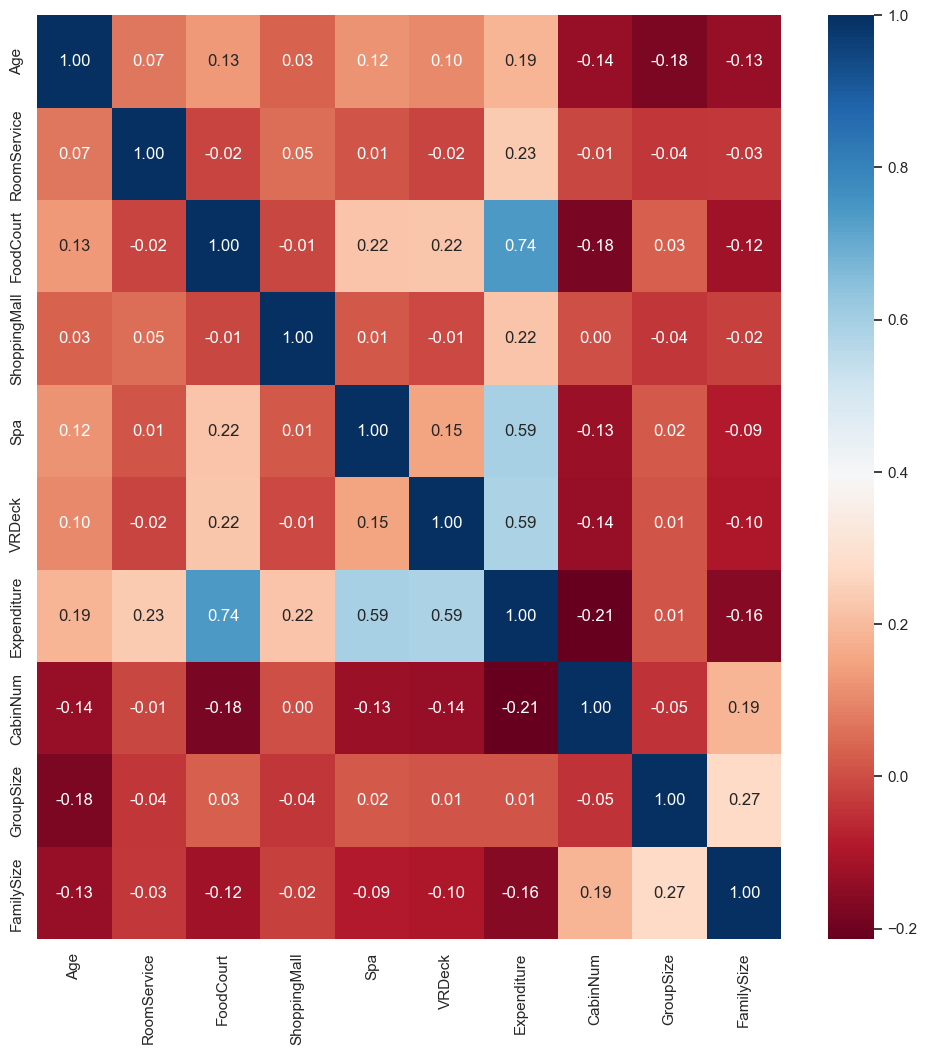

In [11]:
# correlation between numerical variables
fig = plt.figure(figsize=(12, 12))     
sns.heatmap(train[numerical].corr(), annot=True, fmt = ".2f", cmap = "RdBu")
plt.savefig('./figures/eda_2/numerical_corrmap.png')

## Bivariate analysis

In [12]:
# correlation with response
c = pd.DataFrame()
c['corr'] = train.drop(columns=TARGET).corrwith(train[TARGET], numeric_only=True)
c['R2'] = c['corr']**2
c.sort_values(by='R2', ascending=False)

,corr,R2
NoSpending,0.481668,0.232004
CryoSleep,0.467230,0.218303
RoomService,-0.241255,0.058204
Spa,-0.218547,0.047763
VRDeck,-0.204875,0.041974
Expenditure,-0.199522,0.039809
Solo,-0.113792,0.012949
GroupSize,0.082644,0.006830
Age,-0.072975,0.005325
FamilySize,-0.050855,0.002586


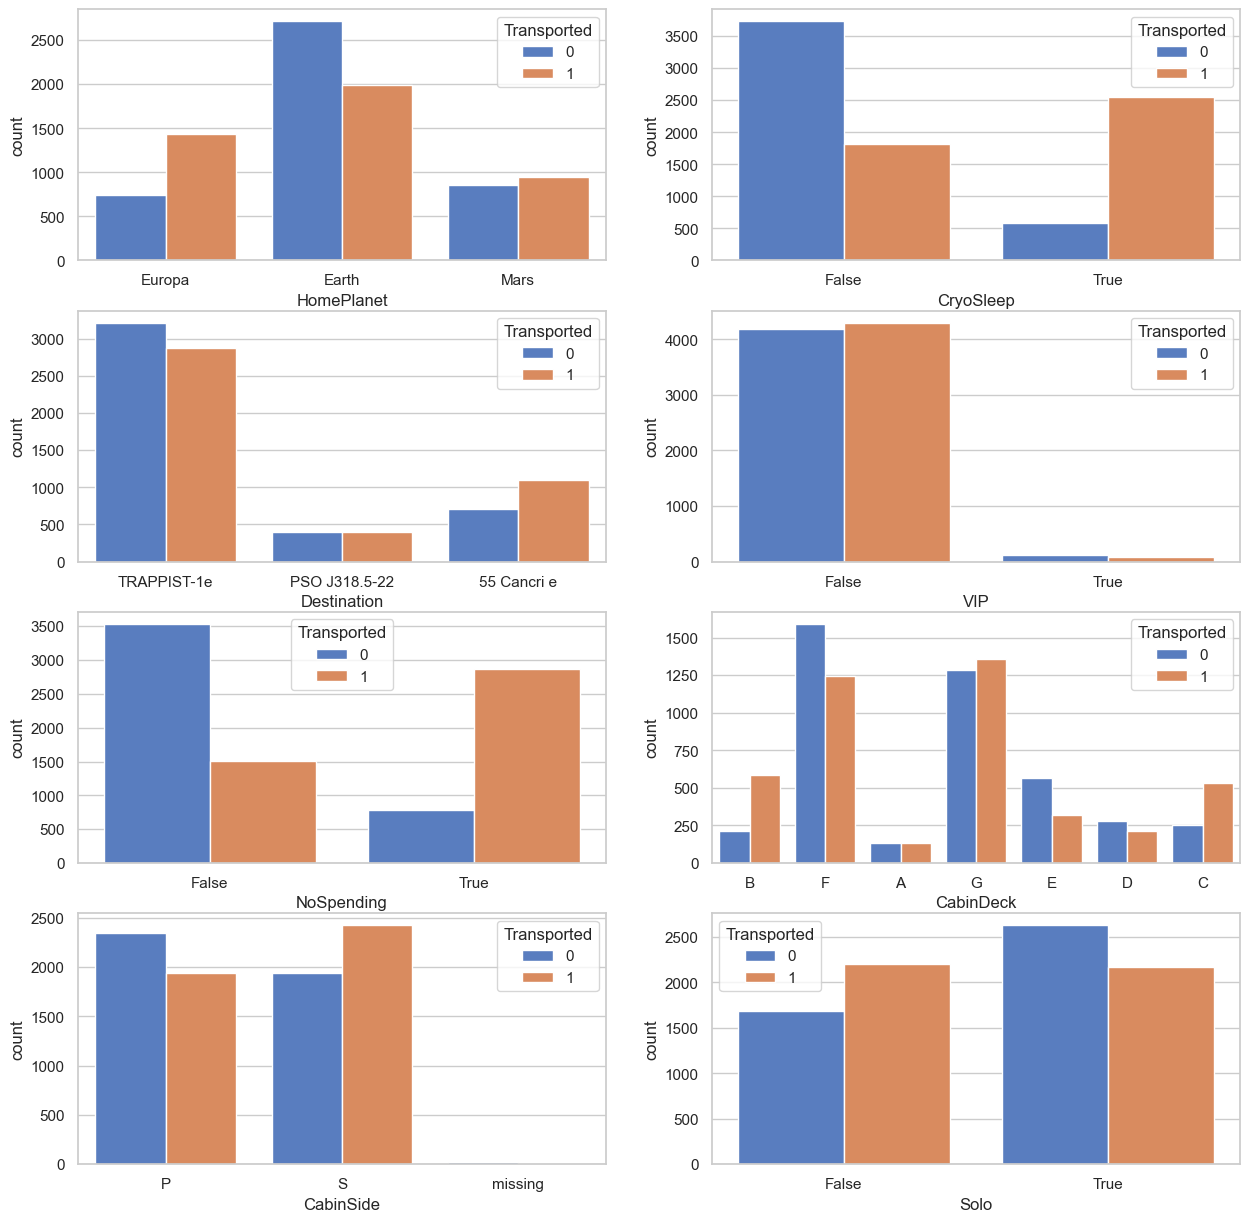

In [13]:
# countplot of categorical features by response value
fig, axs = plt.subplots(4, 2, figsize = (15, 15))
for ax, c in zip(axs.flatten(), categorical):
    sns.countplot(x=c, hue=TARGET, data=train, ax=ax)
plt.savefig('./figures/eda_2/categorical_bivariate.png')

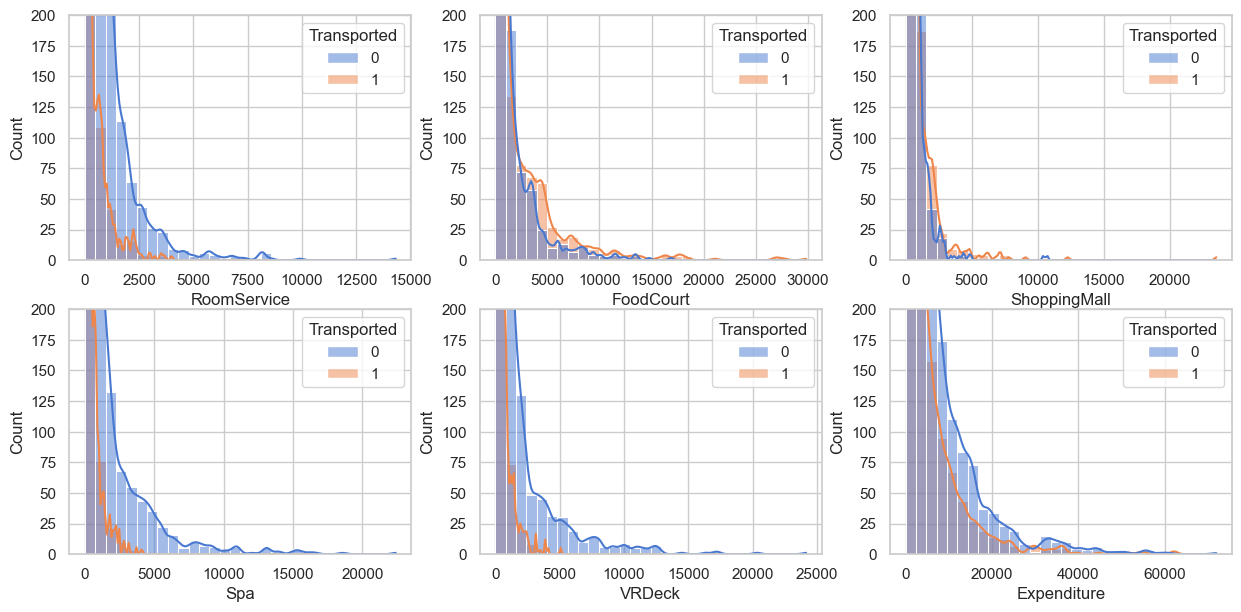

In [14]:
# distribution of expenditure features
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']
fig, axs = plt.subplots(2, 3, figsize = (15, 7))
for ax, c in zip(axs.flatten(), exp_feats):
    sns.histplot(x=c, data=train, bins=30, kde=True, hue=TARGET, ax=ax).set(ylim=[0, 200])
plt.savefig('./figures/eda_2/numerical_bivariate_1.png')

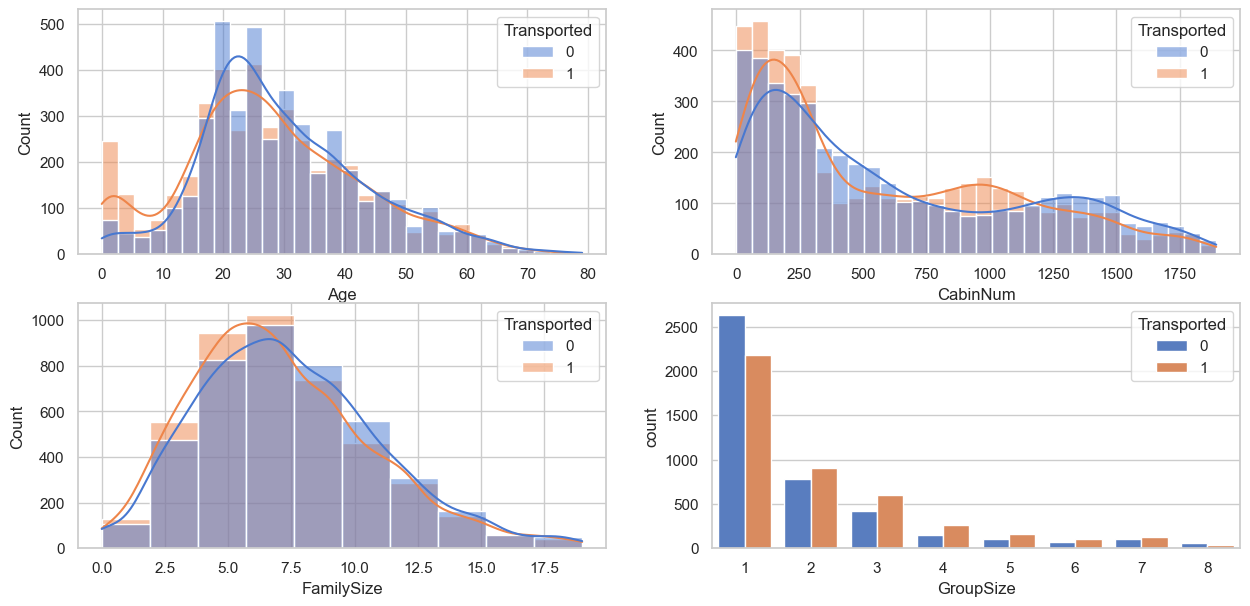

In [15]:
# distribution of other numerical
other_feats = ['Age', 'CabinNum', 'GroupSize', 'FamilySize']
fig, axs = plt.subplots(2, 2, figsize = (15, 7))

sns.histplot(x='Age', data=train, bins=30, kde=True, hue=TARGET, ax=axs.flatten()[0])
sns.histplot(x='CabinNum', data=train, bins=30, kde=True, hue=TARGET, ax=axs.flatten()[1])
sns.histplot(x='FamilySize', data=train, bins=10, kde=True, hue=TARGET, ax=axs.flatten()[2])
sns.countplot(x='GroupSize', data=train, hue=TARGET, ax=axs.flatten()[3])

plt.savefig('./figures/eda_2/numerical_bivariate_2.png')